In [1]:
%matplotlib inline
from pylab import *
rcParams['font.size'] = 15
rcParams['legend.fontsize'] = 12

# Set up paths
inputs = eval(open("../inputs.txt").read())
sys.path.insert(0, inputs['CRANE_dir']+'/02_Inference')

In [2]:
# Import Auger_Data for plotting
import Auger_Data

# import an initialize the UHE_fluence class
from Fluence import UHE_fluence
print 'Loading Lookup Table'
f = np.load(inputs['Lookup_Table'])
input_Z = f['input_Z']
input_A = f['input_A']
input_log10_E = f['input_log10_E']
input_log10_z = f['input_log10_z']
observed_log10_E = f['observed_log10_E']
observed_A = f['observed_A']
uhe_LUT = f['LUT']
fcalc = UHE_fluence(input_Z, input_A, input_log10_E, input_log10_z, observed_A, observed_log10_E, uhe_LUT)

#from Xmax import Xmax_modeler
#log10_Energy_array = np.array([19.0, 19.1, 19.2, 19.3, 19.4, 19.5]) # lower energy bins
#xmm = Xmax_modeler(observed_log10_E)



Loading Lookup Table
Initializing UHE_fluence


In [3]:
# import the likelihood class and initialize the log posterior function
from Likelihood import UHE_likelihood

# Define priors
norm_lower = 0.
norm_upper = np.inf
spectral_index_lower = -np.inf
spectral_index_upper = 0.
E_max_lower = 10.
E_max_upper = 25.

# Predictions
#H   0.388
#He  0.303
#CNO 0.163
#Si  0.045
#Fe  0.101

f_p_lower   = 0.388-0.03
f_p_upper   = 0.388+0.03
f_He_lower  = 0.303-0.03
f_He_upper  = 0.303+0.03
f_N_lower   = 0.163-0.03
f_N_upper   = 0.164+0.03
f_Si_lower  = 0.044-0.03
f_Si_upper  = 0.046+0.03
f_Fe_lower  = 0.100-0.03
f_Fe_upper  = 0.102+0.03

source_index_lower = 3.4
source_index_upper = 5.0
z1_lower   = 1.
z1_upper   = 1.7
z2_lower   = 2.7
z2_upper   = 4.
z3_lower   = 2.7
z3_upper   = 10.

# likelihood could initialize its own fcalc...
logposterior = UHE_likelihood(fcalc, ['Auger', 'Auger_Xmax'],
                              norm_lower = norm_lower, 
                              norm_upper = norm_upper,
                              spectral_index_lower = spectral_index_lower, 
                              spectral_index_upper = spectral_index_upper,
                              E_max_lower = E_max_lower, 
                              E_max_upper = E_max_upper,
                              f_p_lower   = f_p_lower ,  
                              f_p_upper   = f_p_upper,
                              f_He_lower  = f_He_lower,  
                              f_He_upper  = f_He_upper,
                              f_N_lower   = f_N_lower,  
                              f_N_upper   = f_N_upper,
                              f_Si_lower  = f_Si_lower,  
                              f_Si_upper  = f_Si_upper,
                              f_Fe_lower  = f_Fe_lower,  
                              f_Fe_upper  = f_Fe_upper,
                              source_index_lower = source_index_lower, 
                              source_index_upper = source_index_upper,
                              z1_lower = z1_lower,     
                              z1_upper = z1_upper,
                              z2_lower = z2_lower,     
                              z2_upper = z2_upper,
                              z3_lower = z3_lower,     
                              z3_upper = z3_upper)


Initializing UHE_likelihood
Initializing Xmax_modeler


In [4]:
# RANDOMLY SAMPLE PARAMETERS UNTIL WE FIND SOMETHING WITH A FINITE LIKELIHOOD
count = 0 
max_count = 300
best_lp = -np.inf
best_parms = []
N0 = Auger_Data.Counts[np.logical_and(Auger_Data.log10_Energy_low_edges>18.8999,Auger_Data.log10_Energy_low_edges>18.91)][0]
'''
print 'N0',N0
for count in range(0,max_count):
    if(count%10==0): print count
    norm    = np.random.uniform(1.e-70, 1.e-59)
    spc_ind = np.random.uniform(0., -2.)
    E_max   = np.random.uniform(18., 25.)
    r5      = np.random.uniform(0.,1.,5)
    f_p, f_He, f_N, f_Si, f_Fe = r5/np.sum(r5)
    source_index = np.random.uniform(source_index_lower, source_index_upper)
    z1 = np.random.uniform(z1_lower, z1_upper)
    z2 = np.random.uniform(z2_lower, z2_upper)
    z3 = np.random.uniform(z3_lower, z3_upper)
    beta = 10.**np.random.uniform(-5.,5.)
    parms = [norm, spc_ind, E_max, f_He, f_N, f_Si, f_Fe, source_index, z1, z2, z3, beta]
    # renormalize
    fluences = fcalc.fluence_model(*parms)
    nuclear_fluence = np.sum(fluences[1:], axis=0)
    N_model = Auger_Data.Counts_Model(nuclear_fluence[fcalc.observed_log10_E>18.8999])
    parms[0] *= N0/N_model[0]
    lp = logposterior.logprior(parms)
    if(not np.isfinite(lp)):
        continue
    lp = logposterior(parms)
    if(lp>best_lp):
        print lp
        best_lp = lp
        best_parms = parms

parms = best_parms
'''

#H   0.388
#He  0.303
#CNO 0.163
#Si  0.045
#Fe  0.101
parms = np.array([  9.294446601483e-65,  -6.314631577269e-02,   1.878980484278e+01,
   0.303,   0.163,  0.045,
   0.101,   3.572642567752e+00,   1.699999917740e+00,
   2.949030679032e+00,   4.853572919261e+00,   2.398230187623e+00])

parms = np.array([  1.06032128e-64,  -9.04925712e-02,   1.79477262e+01,
         3.23811900e-01,   1.93616639e-01,   5.22563519e-02,
         7.23151010e-02,   4.99969234e+00,   1.53508565e+00,
         3.51037705e+00,   8.00971411e+00])

'''
parms = np.array([  3.709357650510e-63,  -1.647027794302e+00,   1.305045858433e+01,
        2.738534278424e-01,   1.916728863884e-01,   4.725147113373e-02,
        1.279323440944e-01,   3.400000441241e+00,   1.019962484339e+00,
        2.753881651233e+00,   6.515222518573e+00])
'''
'''
parms = np.array([  2.09289287e-64,  -1.86544771e-02,   1.85538492e+01,
         1.91974872e-01,   1.91954799e-01,   4.53372049e-02,
         4.22979369e-07,   3.63732939e+00,   1.69999999e+00,
         3.17767581e+00,   3.17767673e+00])
'''

print 'f_p =', 1.-np.sum(parms[3:7])
print 'Model log-prior:', logposterior.logprior(parms)
lp = logposterior(parms)
print 'Model log-posterior:', lp

f_p = 0.3580000081
Model log-prior: 0.0
Model log-posterior: -3001.77339816


[  5.98260131e-18   3.92428075e-18   2.72007063e-18   1.88538351e-18
   1.28546499e-18   9.10625108e-19   5.59357973e-19   3.55001425e-19
   2.19214955e-19   1.46183952e-19   6.52574363e-20   3.04375744e-20
   1.27852715e-20   2.35298890e-21   1.25944653e-21   3.18955398e-22
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

(18.0, 22.0)

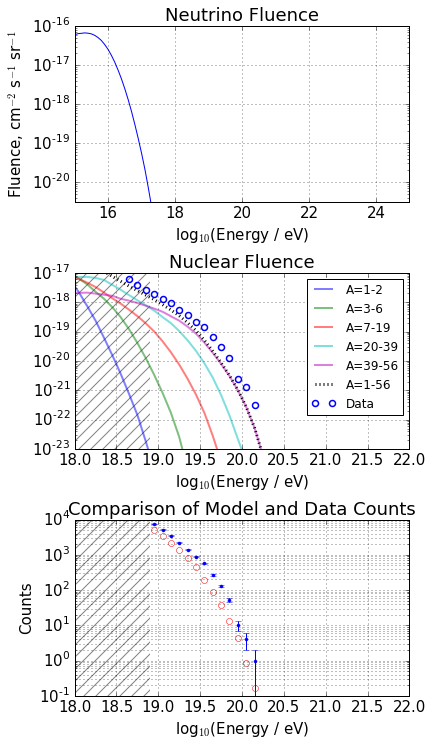

In [5]:
fluences = fcalc.fluence_model(*parms)
nuclear_fluence = np.sum(fluences[1:], axis=0)
N_model = Auger_Data.Counts_Model(nuclear_fluence[fcalc.observed_log10_E>18.8999])


#print input_log10_E

figure(figsize=(6,12))
ax=subplot(311)
ax.set_yscale('log')
plot(observed_log10_E, fluences[0,:], 'b-')
ylabel('Fluence, cm$^{-2}$ s$^{-1}$ sr$^{-1}$')
xlabel('log$_{10}$(Energy / eV)')
grid(True)
title('Neutrino Fluence')
mx = np.max(fluences[0,:])
y1,y2 = ax.get_ylim()
ylim(3.e-5*y2, y2)
xlim(15., 25.)

ax2=subplot(312)
ax2.set_yscale('log')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[1:3], axis=0),   lw=2, alpha=0.5, label='A=1-2')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[3:7], axis=0),   lw=2, alpha=0.5, label='A=3-6')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[7:20], axis=0),  lw=2, alpha=0.5, label='A=7-19')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[20:40], axis=0), lw=2, alpha=0.5, label='A=20-39')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[40:], axis=0),   lw=2, alpha=0.5, label='A=39-56')
ax2.plot(observed_log10_E+0.05, nuclear_fluence, 'k:', lw=3, label='A=1-56')
data_fluence = Auger_Data.Counts.copy()
data_fluence /= np.log(10.) * Auger_Data.d_log10_E
data_fluence /= Auger_Data.Exposure
print data_fluence
ax2.plot(Auger_Data.log10_Energy_low_edges[data_fluence>0.]+0.05,  data_fluence[data_fluence>0.], 'o', mfc='none', mec='b', mew=1.5, label='Data')
mx = np.max(nuclear_fluence)
#ylim(1.e-10*mx, mx)
ylim(1.e-23,1.e-17)
#xlim(15., 25.)
xlim(18., 22.)
legend(loc=1)
y1, y2 = ax2.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
title('Nuclear Fluence')
xlabel('log$_{10}$(Energy / eV)')
subplots_adjust(hspace=0.4)
grid(True)

ax3 = subplot(313)
ax3.set_yscale('log')
from scipy.stats import poisson
p_interval =  poisson.interval(0.68, Auger_Data.Counts)
cut = Auger_Data.Counts>0.
errorbar(Auger_Data.log10_Energy_low_edges[cut] + Auger_Data.d_log10_E/2., 
         Auger_Data.Counts[cut], 
         #xerr = 0.05,
         yerr=[Auger_Data.Counts[cut]-p_interval[0][cut], p_interval[1][cut]-Auger_Data.Counts[cut]], 
         fmt='.')
ylim(0.5, 1.e4)
#xticks(np.arange(18.6, 20.2, 0.1), rotation=45)
grid(True, which='both')
ylabel('Counts')
xlabel('log10 (Energy / eV)')
title('Auger Counts by Energy Bin')
plot(fcalc.observed_log10_E[fcalc.observed_log10_E>18.8999] + 0.05, N_model, 'o', mfc='none', mec='r', label='Model')
grid(True, which='both')
y1, y2 = ax3.get_ylim()
y1=0.1
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
ylim(y1,y2)
title('Comparison of Model and Data Counts')
xlabel('log$_{10}$(Energy / eV)')
xlim(18.,22.)


(56, 100)
Initializing Xmax_modeler


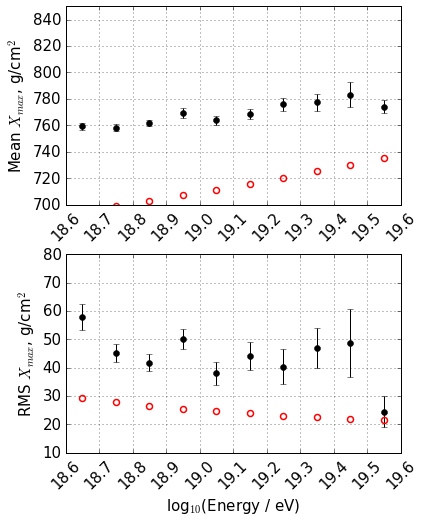

In [6]:
f_A_array = fluences[1:] / nuclear_fluence
#f_A_array = observed_log10_E
print f_A_array.shape

from Xmax import Xmax_modeler
xmm = Xmax_modeler(observed_log10_E)

model_Mean, model_RMS = xmm.getMeanRMS(f_A_array)
model_Mean = np.mean(model_Mean, axis=0)
model_RMS = np.mean(model_RMS, axis=0)

figure(figsize=(6,8))
subplot(211)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_Mean, 
        yerr= Auger_Data.X_max_Mean_err,
        fmt = 'ko')
plot(observed_log10_E + 0.05, model_Mean, 'o', mfc='none', mec='r', mew=1.5)
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('Mean $X_{max}$, g/cm$^2$')
ylim(700., 850.)

subplot(212)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_RMS, 
        yerr= Auger_Data.X_max_RMS_err,
        fmt = 'ko')
plot(observed_log10_E + 0.05, model_RMS, 'o', mfc='none', mec='r', mew=1.5)
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('RMS $X_{max}$, g/cm$^2$')
xlabel('log$_{10}$(Energy / eV)')
subplots_adjust(hspace=0.25)

In [7]:
# Example of applying minimization to improve the solution (at least locally speaking.)
# initial parameter optimization
def minus_lnprob(_parms):
    LL = logposterior(_parms)
    #'''
    print_str = '%1.2e '%LL
    for k in range(0,len(_parms)):
        print_str += '%+1.1e '%_parms[k]
    # print the values occasionally
    if(np.random.randint(0,100)==0): print print_str
    #'''
    return -1.*LL

# max calls is 2400
from scipy.optimize import minimize
max_loop = 5
success = False
loop_count = 0
while success==False and loop_count < max_loop:
    res = minimize(minus_lnprob, parms, method='nelder-mead', options={'xtol': 1e-3, 'disp': True, 'maxiter':15000})
    parms = res.x
    success = res.success
    loop_count += 1
print res
initial_parm_vals = res.x
print 'DONE MINIMIZING'


-inf +1.1e-64 -9.0e-02 +1.8e+01 +3.2e-01 +1.9e-01 +5.2e-02 +7.2e-02 +5.0e+00 +1.5e+00 +3.5e+00 +8.0e+00 
-inf +1.1e-64 -9.0e-02 +1.8e+01 +3.2e-01 +1.9e-01 +5.2e-02 +7.2e-02 +5.0e+00 +1.5e+00 +3.5e+00 +8.0e+00 
Optimization terminated successfully.
         Current function value: 559.414680
         Iterations: 23
         Function evaluations: 263
 final_simplex: (array([[  1.10339689e-64,  -9.04963731e-02,   1.81152305e+01,
          3.23811917e-01,   1.93616649e-01,   5.22563546e-02,
          7.23150734e-02,   4.99969260e+00,   1.53508573e+00,
          3.51037723e+00,   8.00971453e+00],
       [  1.10339686e-64,  -9.04963708e-02,   1.81152318e+01,
          3.23811908e-01,   1.93616644e-01,   5.22563533e-02,
          7.23150872e-02,   4.99969247e+00,   1.53508569e+00,
          3.51037714e+00,   8.00971432e+00],
       [  1.10339686e-64,  -9.04963794e-02,   1.81152301e+01,
          3.23811908e-01,   1.93616644e-01,   5.22563533e-02,
          7.23150872e-02,   4.99969247e+00,   

Maximum Likelihood Parameters
norm	1.10e-64
spectral_index	-0.09
log10_E_max	18.12
f_p	0.3580
f_He	0.3238
f_N	0.1936
f_Si	0.0523
f_Fe	0.0723
source_index	5.00
z1	1.54
z2	3.51
z3	8.01
Model log-posterior: -559.414679931
[  5.98260131e-18   3.92428075e-18   2.72007063e-18   1.88538351e-18
   1.28546499e-18   9.10625108e-19   5.59357973e-19   3.55001425e-19
   2.19214955e-19   1.46183952e-19   6.52574363e-20   3.04375744e-20
   1.27852715e-20   2.35298890e-21   1.25944653e-21   3.18955398e-22
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.

(18.0, 22.0)

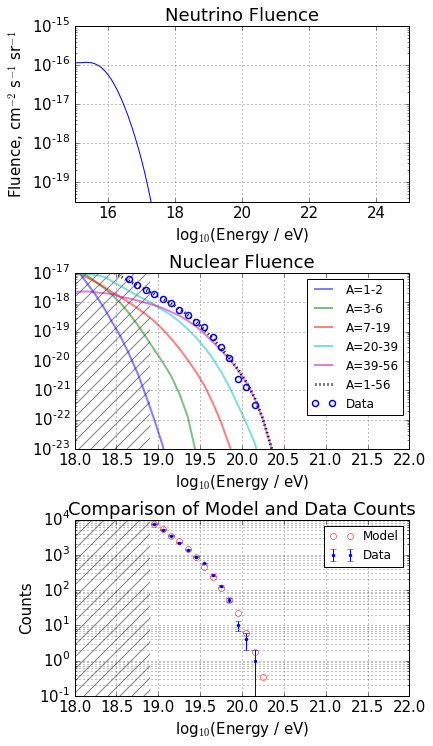

In [8]:
print 'Maximum Likelihood Parameters'
parms = res.x
print 'norm\t%1.2e'%parms[0] 
print 'spectral_index\t%1.2f'%parms[1] 
print 'log10_E_max\t%1.2f'%parms[2]
print 'f_p\t%1.4f'%(1. - np.sum(parms[3:7]))
print 'f_He\t%1.4f'%parms[3]
print 'f_N\t%1.4f'%parms[4]
print 'f_Si\t%1.4f'%parms[5]
print 'f_Fe\t%1.4f'%parms[6]
print 'source_index\t%1.2f'%parms[7]
print 'z1\t%1.2f'%parms[8]
print 'z2\t%1.2f'%parms[9]
print 'z3\t%1.2f'%parms[10]
#print 'beta\t%1.2f'%parms[11]
fluences = fcalc.fluence_model(*parms)
nuclear_fluence = np.sum(fluences[1:], axis=0)
N_model = Auger_Data.Counts_Model(nuclear_fluence[fcalc.observed_log10_E>18.8999])

lp = logposterior(res.x)
print 'Model log-posterior:', lp

#print input_log10_E

figure(figsize=(6,12))
ax=subplot(311)
ax.set_yscale('log')
plot(observed_log10_E, fluences[0,:], 'b-')
ylabel('Fluence, cm$^{-2}$ s$^{-1}$ sr$^{-1}$')
xlabel('log$_{10}$(Energy / eV)')
grid(True)
title('Neutrino Fluence')
mx = np.max(fluences[0,:])
y1,y2 = ax.get_ylim()
ylim(3.e-5*y2, y2)
xlim(15., 25.)

ax2=subplot(312)
ax2.set_yscale('log')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[1:3], axis=0),   lw=2, alpha=0.5, label='A=1-2')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[3:7], axis=0),   lw=2, alpha=0.5, label='A=3-6')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[7:20], axis=0),  lw=2, alpha=0.5, label='A=7-19')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[20:40], axis=0), lw=2, alpha=0.5, label='A=20-39')
ax2.plot(observed_log10_E+0.05, np.sum(fluences[40:], axis=0),   lw=2, alpha=0.5, label='A=39-56')
ax2.plot(observed_log10_E+0.05, nuclear_fluence, 'k:', lw=3, label='A=1-56')
data_fluence = Auger_Data.Counts.copy()
data_fluence /= np.log(10.) * Auger_Data.d_log10_E
data_fluence /= Auger_Data.Exposure
print data_fluence
ax2.plot(Auger_Data.log10_Energy_low_edges[data_fluence>0.]+0.05,  data_fluence[data_fluence>0.], 'o', mfc='none', mec='b', mew=1.5, label='Data')
mx = np.max(nuclear_fluence)
#ylim(1.e-10*mx, mx)
ylim(1.e-23,1.e-17)
#xlim(15., 25.)
xlim(18., 22.)
legend(loc=1)
y1, y2 = ax2.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
title('Nuclear Fluence')
xlabel('log$_{10}$(Energy / eV)')
subplots_adjust(hspace=0.4)
grid(True)

ax3 = subplot(313)
ax3.set_yscale('log')
from scipy.stats import poisson
p_interval =  poisson.interval(0.68, Auger_Data.Counts)
cut = Auger_Data.Counts>0.
errorbar(Auger_Data.log10_Energy_low_edges[cut] + Auger_Data.d_log10_E/2., 
         Auger_Data.Counts[cut], 
         #xerr = 0.05,
         yerr=[Auger_Data.Counts[cut]-p_interval[0][cut], p_interval[1][cut]-Auger_Data.Counts[cut]], 
         fmt='.',
         label='Data')
ylim(0.5, 1.e4)
#xticks(np.arange(18.6, 20.2, 0.1), rotation=45)
grid(True, which='both')
ylabel('Counts')
xlabel('log10 (Energy / eV)')
title('Auger Counts by Energy Bin')
plot(fcalc.observed_log10_E[fcalc.observed_log10_E>18.8999] + 0.05, N_model, 'o', mfc='none', mec='r', label='Model')
grid(True, which='both')
y1, y2 = ax3.get_ylim()
y1=0.1
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
ylim(y1,y2)
title('Comparison of Model and Data Counts')
xlabel('log$_{10}$(Energy / eV)')
legend()
xlim(18.,22.)



(56, 100)
Initializing Xmax_modeler


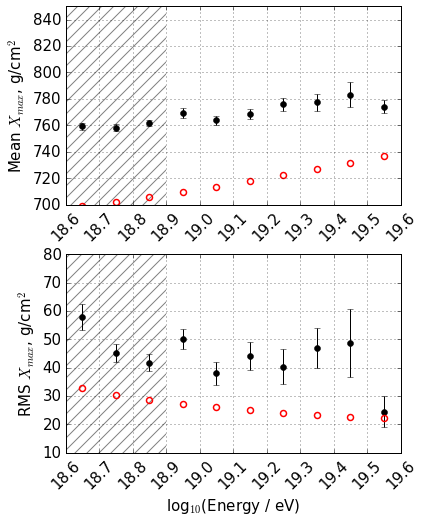

In [9]:
f_A_array = fluences[1:] / nuclear_fluence
#f_A_array = observed_log10_E
print f_A_array.shape

from Xmax import Xmax_modeler
xmm = Xmax_modeler(observed_log10_E)

model_Mean, model_RMS = xmm.getMeanRMS(f_A_array)
model_Mean = np.mean(model_Mean, axis=0)
model_RMS = np.mean(model_RMS, axis=0)

figure(figsize=(6,8))
ax1 = subplot(211)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_Mean, 
        yerr= Auger_Data.X_max_Mean_err,
        fmt = 'ko')
plot(observed_log10_E + 0.05, model_Mean, 'o', mfc='none', mec='r', mew=1.5)
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('Mean $X_{max}$, g/cm$^2$')
ylim(700., 850.)
y1,y2 = ax1.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)

ax2 = subplot(212)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_RMS, 
        yerr= Auger_Data.X_max_RMS_err,
        fmt = 'ko')
plot(observed_log10_E + 0.05, model_RMS, 'o', mfc='none', mec='r', mew=1.5)
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('RMS $X_{max}$, g/cm$^2$')
xlabel('log$_{10}$(Energy / eV)')
y1,y2 = ax2.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)

subplots_adjust(hspace=0.25)
